In [3]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
import sys

##plt.style.use('fivethirtyeight')

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.400000


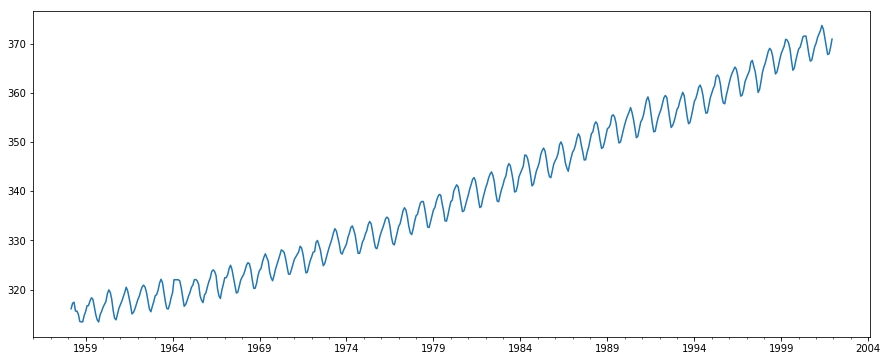

In [4]:

data = sm.datasets.co2.load_pandas()
y = data.data
#print(y)
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
print(y)
print(type(y))
y.plot(figsize=(15, 6))
plt.show()


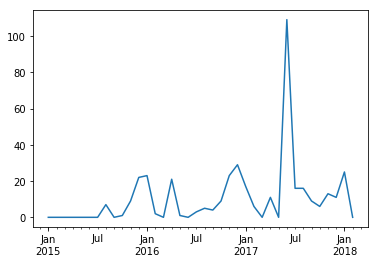

'\nfname = \'152018tstunif.csv\'\ny = pd.read_csv(fname)\ny3 = y\ny3.set_index(\'date\')\ny2 = y3[(y3[\'date\'] >= "01-01-2015") & (y3[\'date\'] <= "24-11-2016")]\ny2 = y2.iloc[:, :2]\n'

In [5]:
file_name = '150215.csv'
def parser(x):
	return datetime.datetime.strptime(x, '%d-%m-%Y')
y = pd.read_csv(file_name, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
y.plot()
plt.show()
'''
fname = '152018tstunif.csv'
y = pd.read_csv(fname)
y3 = y
y3.set_index('date')
y2 = y3[(y3['date'] >= "01-01-2015") & (y3['date'] <= "24-11-2016")]
y2 = y2.iloc[:, :2]
'''

In [6]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

##print('Examples of parameter combinations for Seasonal ARIMA...')
##print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
##rint('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
##print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
##print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages


In [7]:
for param in pdq:
	for param_seasonal in seasonal_pdq:
		try:
			mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
			results = mod.fit()
			print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
		except:
			continue

mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 0),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
#print(results.summary().tables[1])
##results.plot_diagnostics(figsize=(15, 12))
##plt.show()

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:876.0823486596516
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:241.43601074678935
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:234.29051147019732
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:138.9160024852396
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:325.593918355691
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:930.9228031041172
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:223.99617083393545
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:243.0058010451583
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:227.74075572064928
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:140.7015076105204
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:245.92201729568586
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:137.1597317226532
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:311.51625054935283
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:814.1358484315874
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:216.58653162180005
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:232.72946103450508
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 

2016-09-01 00:00:00
The Mean Squared Error of our osf predictions is 883.11


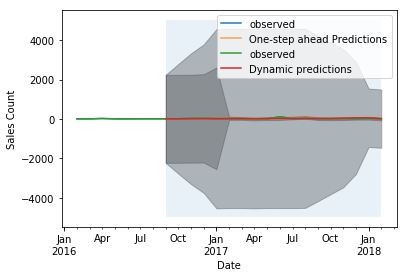

The Mean Squared Error of our dynamic predictions is 730.53
pred_ci                lower x     upper x
2018-03-01  -70.216775   68.586328
2018-04-01  -48.312534  103.882494
2018-05-01  -91.057914   93.532790
2018-06-01 -174.763690   26.948708
2018-07-01 -117.398367  105.163381
2018-08-01 -122.178165  116.801985
2018-09-01 -127.514804  128.170382
2018-10-01 -124.568702  146.092298
2018-11-01 -113.124699  172.091606
y1 2018-03-01    -70.216775
2018-04-01    -48.312534
2018-05-01    -91.057914
2018-06-01   -174.763690
2018-07-01   -117.398367
2018-08-01   -122.178165
2018-09-01   -127.514804
2018-10-01   -124.568702
2018-11-01   -113.124699
Freq: MS, Name: lower x, dtype: float64
y2 2018-03-01     68.586328
2018-04-01    103.882494
2018-05-01     93.532790
2018-06-01     26.948708
2018-07-01    105.163381
2018-08-01    116.801985
2018-09-01    128.170382
2018-10-01    146.092298
2018-11-01    172.091606
Freq: MS, Name: upper x, dtype: float64
The Mean Squared Error of our forecasts is 493

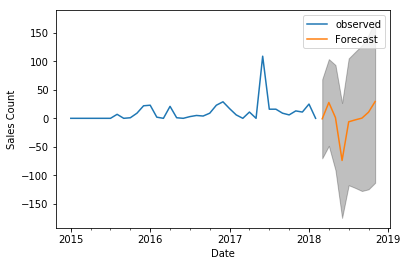

In [8]:
smp = pd.to_datetime("1-09-2016",format='%d-%m-%Y')
print(smp)
pred = results.get_prediction(start=pd.to_datetime("1-09-2016",format='%d-%m-%Y'), dynamic=False)
pred_ci = pred.conf_int()
ax = y["1-09-2016":].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Predictions', alpha=.7)

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Count')
plt.legend()
##plt.show()

y_forecasted = pred.predicted_mean
y_truth = y["1-09-2016":]

# Compute the mean square error
mse1 = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our osf predictions is {}'.format(round(mse1, 2)))

pred_dynamic = results.get_prediction(start=pd.to_datetime("01-09-2016",format='%d-%m-%Y'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y["01-09-2016":].plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic predictions', ax=ax)

ax.fill_between(pred_dynamic_ci.index,pred_dynamic_ci.iloc[:, 0],pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime("01-09-2016",format='%d-%m-%Y'), y.index[-1],alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Count')

plt.legend()
plt.show()

# Extract the predicted and true values of our time series for dynamic forecast
y_forecasted = pred_dynamic.predicted_mean
y_truth = y["01-09-2016":]

# Compute the mean square error
mse2 = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our dynamic predictions is {}'.format(round(mse2, 2)))

# Get forecast 6 steps ahead in future i.e. for 9 months in future in this case
pred_uc = results.get_forecast(steps=9)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
print('pred_ci {}'.format(pred_ci))


y1 = pred_ci.iloc[:, 0]
y2 = pred_ci.iloc[:, 1]
print('y1 {}'.format(y1))
print('y2 {}'.format(y2))
mse3 = ((y1 - y2) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse3, 2)))
print('pred_uc.predicted_mean {}'.format(pred_uc.predicted_mean))
ax = y.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Count')

plt.legend()
plt.show()